In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/table_missing.csv')
df.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,NaN,M,street_1,173,NaN,34.0,A+
1,S_1,C_1,NaN,F,street_2,192,NaN,32.5,B+
2,S_1,C_1,1103.0,M,street_2,186,NaN,87.2,B+
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
4,S_1,C_1,1105.0,NaN,street_4,159,64.0,84.8,A-


# 一.缺失观测及其类型

## 1. 了解缺失信息

### a) isna和notna方法

In [4]:
# 对Series使用会返回布尔列表
df['Physics'].isna().head()

0    False
1    False
2    False
3     True
4    False
Name: Physics, dtype: bool

In [5]:
df['Physics'].notna().head()

0     True
1     True
2     True
3    False
4     True
Name: Physics, dtype: bool

In [6]:
# 对Dataframe使用会返回布尔表
df.isna().head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,False,False,True,False,False,False,True,False,False
1,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,True,True,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False


In [7]:
# 统计每列有多少缺失值
df.isna().sum()

School      0
Class       4
ID          6
Gender      7
Address     0
Height      0
Weight     13
Math        5
Physics     4
dtype: int64

In [8]:
# 此外，可以通过info函数查看缺失信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
School     35 non-null object
Class      31 non-null object
ID         29 non-null float64
Gender     28 non-null object
Address    35 non-null object
Height     35 non-null int64
Weight     22 non-null float64
Math       30 non-null float64
Physics    31 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 2.5+ KB


### b)查看行的缺失值

In [9]:
df[df['Physics'].isna()]

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
8,S_1,C_2,1204.0,F,street_5,162,63.0,33.8,NaN
13,S_1,C_3,1304.0,NaN,street_2,195,70.0,85.2,NaN
22,S_2,C_2,2203.0,M,street_4,155,91.0,73.8,NaN


In [10]:
df.loc[df['Physics'].isna()]

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
8,S_1,C_2,1204.0,F,street_5,162,63.0,33.8,NaN
13,S_1,C_3,1304.0,NaN,street_2,195,70.0,85.2,NaN
22,S_2,C_2,2203.0,M,street_4,155,91.0,73.8,NaN


### c)挑选出所有非缺失值行/列

In [11]:
# 使用all就是全部非缺失值，如果是any就是至少有一个不是缺失值
df[df.notna().all(1)]

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
5,S_1,C_2,1201.0,M,street_5,159,68.0,97.0,A-
6,S_1,C_2,1202.0,F,street_4,176,94.0,63.5,B-
12,S_1,C_3,1303.0,M,street_7,188,82.0,49.7,B
17,S_2,C_1,2103.0,M,street_4,157,61.0,52.5,B-
21,S_2,C_2,2202.0,F,street_7,194,77.0,68.5,B+
25,S_2,C_3,2301.0,F,street_4,157,78.0,72.3,B+
27,S_2,C_3,2303.0,F,street_7,190,99.0,65.9,C
28,S_2,C_3,2304.0,F,street_6,164,81.0,95.5,A-
29,S_2,C_3,2305.0,M,street_4,187,73.0,48.9,B


In [17]:
df.notna().all(1).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [23]:
df.notna().all(0)

School      True
Class      False
ID         False
Gender     False
Address     True
Height      True
Weight     False
Math       False
Physics    False
dtype: bool

In [22]:
df.loc[:,df.notna().all(0)].head()

,School,Address,Height
0,S_1,street_1,173
1,S_1,street_2,192
2,S_1,street_2,186
3,S_1,street_2,167
4,S_1,street_4,159


In [26]:
df[df.isna().any(1)].head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,NaN,M,street_1,173,NaN,34.0,A+
1,S_1,C_1,NaN,F,street_2,192,NaN,32.5,B+
2,S_1,C_1,1103.0,M,street_2,186,NaN,87.2,B+
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
4,S_1,C_1,1105.0,NaN,street_4,159,64.0,84.8,A-


## 2.三种缺失符号

### a)np.nan 麻烦的东东

In [29]:
# np.nan不等于任何东西，甚至不等于自己
print(np.nan==np.nan)
print(np.nan==0)
print(np.nan==None)

False
False
False


In [30]:
# 在用equals函数比较时，自动略过两侧全是np.nan的单元格，因此结果不会影响
df.equals(df)

True

In [31]:
# nan在numpy中的类型位浮点，因此当数据集读入时，即使原来时整数的列，只要有缺失值就会变为浮点型
type(np.nan)

float

In [32]:
pd.Series([1,np.nan,3]).dtype

dtype('float64')

In [33]:
# 对于布尔类型的列表，nan会自动填充为true
pd.Series([1,np.nan,3],dtype='bool')

0    True
1    True
2    True
dtype: bool

In [34]:
# 当修改一个布尔列表时，会改变列表类型，而不是赋值为True
s = pd.Series([True,False],dtype='bool')
s[1]=np.nan
s

0    1.0
1    NaN
dtype: float64

In [35]:
# 在所有的表格读取后，无论列是存放什么类型的数据，默认的缺失值全为np.nan类型
# 因此整型列转为浮点；而字符由于无法转化为浮点，因此只能归并为object类型（'O'），原来是浮点型的则类型不变
df['ID'].dtype

dtype('float64')

In [36]:
df['Math'].dtype

dtype('float64')

In [37]:
df['Class'].dtype

dtype('O')

### b) None

In [38]:
# 首先，None等于自身
None == None

True

In [39]:
# None的布尔值为False
pd.Series([None],dtype='bool')

0    False
dtype: bool

In [40]:
# 修改布尔列表不会改变数据类型
s = pd.Series([True,False],dtype='bool')
s[0]=None
s

0    False
1    False
dtype: bool

In [41]:
s = pd.Series([1,0],dtype='bool')
s[0]=None
s

0    False
1    False
dtype: bool

In [42]:
# 在传入数值类型后，会自动变为np.nan
type(pd.Series([1,None])[1])

numpy.float64

In [43]:
# 只有当传入object类型是保持不动，几乎可以认为，除非人工命名None，它基本不会自动出现在Pandas中
type(pd.Series([1,None],dtype='O')[1])

NoneType

In [44]:
# 在使用equals函数时不会被略过，因此下面的情况下返回False
pd.Series([None]).equals(pd.Series([np.nan]))

False

### c) NaT

NaT是针对时间序列的缺失值，是Pandas的内置类型，可以完全看做时序版本的np.nan，与自己不等，且使用equals是也会被跳过

In [46]:
s_time = pd.Series([pd.Timestamp('20120101')]*5)
s_time

0   2012-01-01
1   2012-01-01
2   2012-01-01
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [48]:
s_time[2] = None
s_time

0   2012-01-01
1   2012-01-01
2          NaT
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [49]:
s_time[2] = np.nan
s_time

0   2012-01-01
1   2012-01-01
2          NaT
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [52]:
s_time[2] = pd.NaT
s_time

0   2012-01-01
1   2012-01-01
2          NaT
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [53]:
type(s_time[2])

pandas._libs.tslibs.nattype.NaTType

In [54]:
# NaT也不等于自己
s_time[2] == s_time[2]

False

In [55]:
s_time.equals(s_time)

True

In [56]:
# 在布尔序列中，NaT默认值为True
s = pd.Series([True,False],dtype='bool')
s[1]=pd.NaT
s

0    True
1    True
dtype: bool

## 3.Nullable类型和NA符号

这是Pandas在1.0新版本中引入的重大改变，其目的就是为了（在若干版本后）解决之前出现的混乱局面

### a) Nullable整型

对于该种类型而言，它与原来标记int上的符号区别在于首字母大写：'Int'

In [57]:
s_original = pd.Series([1, 2], dtype="int64")
s_original

0    1
1    2
dtype: int64

In [58]:
s_new = pd.Series([1, 2], dtype="Int64")
s_new

0    1
1    2
dtype: Int64

它的好处就在于，其中前面提到的三种缺失值都会被替换为统一的NA符号，且不改变数据类型

In [59]:
s_original[1] = np.nan
s_original

0    1.0
1    NaN
dtype: float64

In [60]:
s_new[1] = np.nan
s_new

0      1
1    NaN
dtype: Int64

In [61]:
s_new[1] = None
s_new

0      1
1    NaN
dtype: Int64

In [62]:
s_new[1] = pd.NaT
s_new

0      1
1    NaN
dtype: Int64

### b)Nullable 布尔

对于该种类型而言，作用与上面的类似，记号为boolean

In [7]:
s_original = pd.Series([1, 0], dtype="bool")
s_original

0     True
1    False
dtype: bool

In [8]:
s_new = pd.Series([0, 1], dtype="boolean")
s_new

0    False
1     True
dtype: boolean

In [9]:
s_original[0] = np.nan
s_original

0    NaN
1    0.0
dtype: float64

In [10]:
s_original = pd.Series([1, 0], dtype="bool") #此处重新加一句是因为前面赋值改变了bool类型
s_original[0] = None
s_original

0    False
1    False
dtype: bool

In [11]:
s_new[0] = np.nan
s_new

0    <NA>
1    True
dtype: boolean

In [12]:
s_new[0] = None
s_new

0    <NA>
1    True
dtype: boolean

In [16]:
pd.NA == pd.NA

<NA>

In [17]:
s_new[0] = pd.NaT
s_new

0    <NA>
1    True
dtype: boolean

In [18]:
s = pd.Series(['dog','cat'])
s[s_new]

1    cat
dtype: object

### c) string类型

该类型是1.0的一大创新，目的之一就是为了区分开原本含糊不清的object类型，这里将简要地提及string，因为它是第7章的主题内容

它本质上也属于Nullable类型，因为并不会因为含有缺失而改变类型

In [20]:
s = pd.Series(['dog','cat'],dtype='string')
s

0    dog
1    cat
dtype: string

In [21]:
s[0] = np.nan
s

0    <NA>
1     cat
dtype: string

In [22]:
s[0] = None
s

0    <NA>
1     cat
dtype: string

In [23]:
s[0] = pd.NaT
s

0    <NA>
1     cat
dtype: string

此外，和object类型的一点重要区别就在于，在调用字符方法后，string类型返回的是Nullable类型，object则会根据缺失类型和数据类型而改变

In [24]:
s = pd.Series(["a", None, "b"], dtype="string")
s.str.count('a')

0       1
1    <NA>
2       0
dtype: Int64

In [25]:
s2 = pd.Series(["a", None, "b"], dtype="object")
s2.str.count("a")

0    1.0
1    NaN
2    0.0
dtype: float64

In [26]:
s.str.isdigit()

0    False
1     <NA>
2    False
dtype: boolean

In [27]:
s2.str.isdigit()

0    False
1     None
2    False
dtype: object

## 4.NA的特性

### a)逻辑运算
只需看该逻辑运算的结果是否依赖pd.NA的取值，如果依赖，则结果还是NA，如果不依赖，则直接计算结果

In [28]:
True | pd.NA

True

In [29]:
pd.NA | True

True

In [30]:
False | pd.NA

<NA>

In [32]:
# 取值不明报错
bool(pd.NA)

TypeError: boolean value of NA is ambiguous

### b)算数运算和比较运算                                                                 

这里只需记住除了下面两类情况，其他结果都是NA即可

In [34]:
print(pd.NA ** 0)
print(1 ** pd.NA)

1
1


In [35]:
print(pd.NA+1)

<NA>


## 5.convert_dtypes方法
#### 读取数据时，就把数据列转为Nullable类型，是1.0的新函数


In [37]:
pd.read_csv('data/table_missing.csv').dtypes

School      object
Class       object
ID         float64
Gender      object
Address     object
Height       int64
Weight     float64
Math       float64
Physics     object
dtype: object

In [38]:
pd.read_csv('data/table_missing.csv').convert_dtypes().dtypes

School      string
Class       string
ID           Int64
Gender      string
Address     string
Height       Int64
Weight       Int64
Math       float64
Physics     string
dtype: object

# 二. 缺失数据的运算与分组

## 1.加号与乘号规则

In [39]:
#使用加法时，缺失值为0
s = pd.Series([2,3,np.nan,4])
s.sum()

9.0

In [41]:
#使用乘法时，缺失值为1
s.prod()

24.0

In [42]:
#使用累计函数时，缺失值自动略过
s.cumsum()

0    2.0
1    5.0
2    NaN
3    9.0
dtype: float64

In [43]:
s.cumprod()

0     2.0
1     6.0
2     NaN
3    24.0
dtype: float64

In [44]:
s.pct_change()

0         NaN
1    0.500000
2    0.000000
3    0.333333
dtype: float64

## 2.groupby方法中的缺失值

#### 自动忽略缺失值的组

In [45]:
df_g = pd.DataFrame({'one':['A','B','C','D',np.nan],'two':np.random.randn(5)})
df_g

,one,two
0,A,-0.967564
1,B,-0.256427
2,C,-0.103107
3,D,0.996151
4,NaN,-0.504322


In [46]:
df_g.groupby('one').groups

{'A': Int64Index([0], dtype='int64'),
 'B': Int64Index([1], dtype='int64'),
 'C': Int64Index([2], dtype='int64'),
 'D': Int64Index([3], dtype='int64')}

In [47]:
df.groupby('School').groups

{'S_1': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64'),
 'S_2': Int64Index([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
             32, 33, 34],
            dtype='int64')}

# 三.填充与剔除

## 1.fillna方法
### a）值填充与前后向填充（分别与ffill方法和bfill方法等价）

In [48]:
df['Physics'].fillna('missing').head()

0         A+
1         B+
2         B+
3    missing
4         A-
Name: Physics, dtype: object

In [52]:
df = df.convert_dtypes()

In [56]:
df['Physics'].fillna('missing').head()

0         A+
1         B+
2         B+
3    missing
4         A-
Name: Physics, dtype: string

In [57]:
#前向填充，filla
df['Physics'].fillna(method='ffill').head()

0    A+
1    B+
2    B+
3    B+
4    A-
Name: Physics, dtype: string

In [59]:
#后向填充，backfill
df['Physics'].fillna(method='backfill').head()

0    A+
1    B+
2    B+
3    A-
4    A-
Name: Physics, dtype: string

### b)填充中的对齐特性

In [61]:
df_f = pd.DataFrame({'A':[1,3,np.nan],'B':[2,4,np.nan],'C':[3,5,np.nan]})
df_f

,A,B,C
0,1.0,2.0,3.0
1,3.0,4.0,5.0
2,NaN,NaN,NaN


In [62]:
df_f.fillna(df_f.mean())

,A,B,C
0,1.0,2.0,3.0
1,3.0,4.0,5.0
2,2.0,3.0,4.0


In [67]:
# 返回的结果中没有C，根据对齐特点不会被填充
df_f.fillna(df_f.mean()[['A','B']])

,A,B,C
0,1.0,2.0,3.0
1,3.0,4.0,5.0
2,2.0,3.0,NaN


## 2.dropna方法

### a)axis参数

In [68]:
df_d = pd.DataFrame({'A':[np.nan,np.nan,np.nan],'B':[np.nan,3,2],'C':[3,2,1]})
df_d

,A,B,C
0,NaN,NaN,3
1,NaN,3.0,2
2,NaN,2.0,1


In [69]:
df_d.dropna(axis=0)

,A,B,C


In [70]:
df_d.dropna(axis=1)

,C
0,3
1,2
2,1


### b)how参数（可以选all或者any,全为缺失才去除，存在缺失就去除）

In [71]:
df_d.dropna(axis=1,how='all')

,B,C
0,NaN,3
1,3.0,2
2,2.0,1


In [72]:
df_d.dropna(axis=1,how='any')

,C
0,3
1,2
2,1


### c）subset参数（即在某一组列范围中搜索缺失值）

In [75]:
df_d.dropna(axis=0,subset=['B','C'])

,A,B,C
1,NaN,3.0,2
2,NaN,2.0,1


# 四.插值

## 1.线性插值

### a)索引无关的线性插值

In [76]:
s = pd.Series([1,10,15,-5,-2,np.nan,np.nan,28])
s

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     NaN
6     NaN
7    28.0
dtype: float64

In [77]:
s.interpolate()

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     8.0
6    18.0
7    28.0
dtype: float64

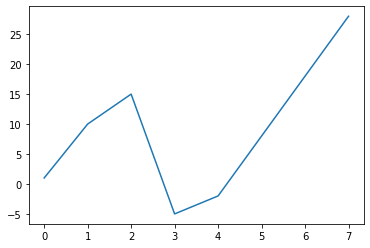

In [79]:
import matplotlib
s.interpolate().plot()

In [80]:
s.index = np.sort(np.random.randint(50,300,8))
s.interpolate()
# 此时插值与索引无关

93      1.0
140    10.0
159    15.0
176    -5.0
242    -2.0
253     8.0
260    18.0
280    28.0
dtype: float64

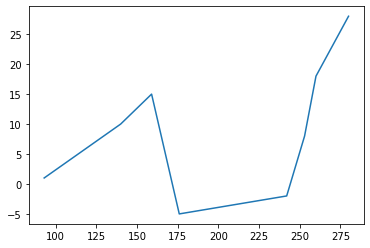

In [81]:
s.interpolate().plot()
#后面三个点不是线性的（如果几乎为线性函数，请重新运行上面的一个代码块，这是随机性导致的）

In [83]:
# 如果索引是时间，那么可以按照时间长短插值，对于时间序列将在第9章详细介绍
s_t = pd.Series([0,np.nan,10]
        ,index=[pd.Timestamp('2012-05-01'),pd.Timestamp('2012-05-07'),pd.Timestamp('2012-06-03')])
s_t

2012-05-01     0.0
2012-05-07     NaN
2012-06-03    10.0
dtype: float64

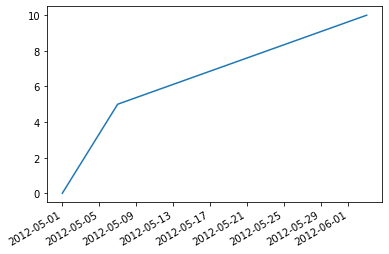

In [84]:
s_t.interpolate().plot()

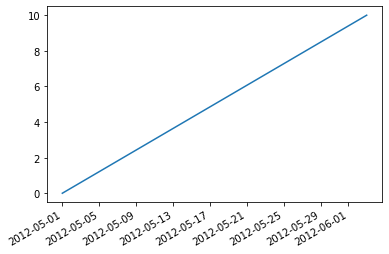

In [85]:
s_t.interpolate(method='time').plot()

## 2. 高级插值方法

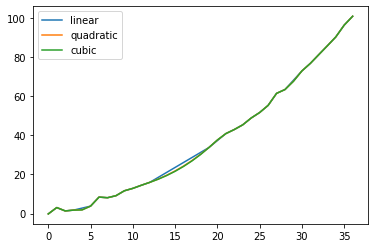

In [86]:
ser = pd.Series(np.arange(1, 10.1, .25) ** 2 + np.random.randn(37))
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[missing] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()

## 3.interpolate中的限制参数
### a)limit表示最多插入多少个

In [87]:
s = pd.Series([1,np.nan,np.nan,np.nan,5])
s.interpolate(limit=2)

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

### b) limit_direction表示插值方向，可选forward,backward,both，默认前向

In [89]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan,])
print(s)
s.interpolate(limit_direction='backward')

0    NaN
1    NaN
2    1.0
3    NaN
4    NaN
5    NaN
6    5.0
7    NaN
8    NaN
dtype: float64


0    1.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

### c）limit_area表示插值区域，可选inside,outside，默认None

In [91]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan,])
print(s)
s.interpolate(limit_area='inside')

0    NaN
1    NaN
2    1.0
3    NaN
4    NaN
5    NaN
6    5.0
7    NaN
8    NaN
dtype: float64


0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

In [92]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan,])
print(s)
s.interpolate(limit_area='outside')

0    NaN
1    NaN
2    1.0
3    NaN
4    NaN
5    NaN
6    5.0
7    NaN
8    NaN
dtype: float64


0    NaN
1    NaN
2    1.0
3    NaN
4    NaN
5    NaN
6    5.0
7    5.0
8    5.0
dtype: float64

问题一：如何删除缺失值占比超过25%的列


In [103]:
df = pd.read_csv('data/table_missing.csv')
na = df.isna().sum(0)/df.notna().sum(0)
na

School     0.000000
Class      0.129032
ID         0.206897
Gender     0.250000
Address    0.000000
Height     0.000000
Weight     0.590909
Math       0.166667
Physics    0.129032
dtype: float64

In [128]:
df.loc[:,na<0.25].head()

,School,Class,ID,Address,Height,Math,Physics
0,S_1,C_1,NaN,street_1,173,34.0,A+
1,S_1,C_1,NaN,street_2,192,32.5,B+
2,S_1,C_1,1103.0,street_2,186,87.2,B+
3,S_1,NaN,NaN,street_2,167,80.4,NaN
4,S_1,C_1,1105.0,street_4,159,84.8,A-


问题2:什么事Nullable类型？请谈谈为什么要引入这个设计？

对于一份有缺失值的数据，可以采取哪些策略或方法深化对它的了解？

先info()一下，看下缺失情况，再计算缺失的比例。

练习一：
a)请以列类型读入数据，并选出C为缺失值的行。

In [131]:
df = pd.read_csv('data/Missing_data_one.csv')

In [132]:
df.head()

,A,B,C
0,not_NaN,0.922,4.0
1,not_NaN,0.700,NaN
2,not_NaN,0.503,8.0
3,not_NaN,0.938,4.0
4,not_NaN,0.952,10.0


In [137]:
df = df.convert_dtypes()
df.loc[df['C'].isna()]

,A,B,C
1,not_NaN,0.700,<NA>
5,not_NaN,0.972,<NA>
11,not_NaN,0.736,<NA>
19,not_NaN,0.684,<NA>
21,not_NaN,0.913,<NA>


b)现需要将A中的部分单元转为缺失值，单元格中的最小转换概率为25%，且概率大小与所在行B列单元的值成正比。

练习2:a)统计各列缺失的比例并选出在后三列中至少有两个非缺失值的行。

In [145]:
df = pd.read_csv('data/Missing_data_two.csv')

In [146]:
df.head()

,编号,地区,身高,体重,年龄,工资
0,1,A,157.50,NaN,47.0,15905.0
1,2,B,202.00,91.80,25.0,NaN
2,3,C,169.09,62.18,NaN,NaN
3,4,A,166.61,59.95,77.0,5434.0
4,5,B,185.19,NaN,62.0,4242.0


In [147]:
na = df.isna().sum(0)/df.notna().sum(0)
na

编号    0.000000
地区    0.000000
身高    0.000000
体重    0.285714
年龄    0.333333
工资    0.285714
dtype: float64

In [153]:
df.dropna(axis=0,thresh=2,subset=['体重','年龄','工资']).head(10)

,编号,地区,身高,体重,年龄,工资
0,1,A,157.50,NaN,47.0,15905.0
1,2,B,202.00,91.80,25.0,NaN
3,4,A,166.61,59.95,77.0,5434.0
4,5,B,185.19,NaN,62.0,4242.0
5,6,A,187.13,78.42,55.0,13959.0
6,7,C,163.81,57.43,43.0,6533.0
7,8,A,183.80,75.42,48.0,19779.0
8,9,B,179.67,71.70,65.0,8608.0
9,10,C,186.08,77.47,65.0,12433.0
10,11,B,163.41,57.07,NaN,6495.0


b)请结合身高列和地区列中的数据，对体重进行合理插值。

In [157]:
df['体重'].isna().sum()

8

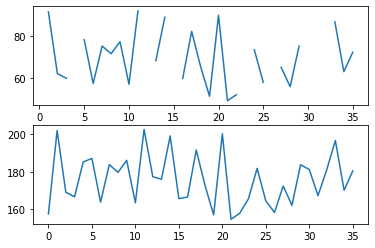

In [166]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
df['体重'].plot()
plt.subplot(2,1,2)
df['身高'].plot()